In [65]:
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt

In [66]:
# Initialize a dictionary to store counts of different elements
elements_count = {}
genbank_file = "Bacillus clausii.gb"
# Parse the GenBank file
for record in SeqIO.parse(genbank_file, "genbank"):
    # Iterate over features in each record
    for feature in record.features:
        # Get the type of the feature
        feature_type = feature.type
        # Increment the count for this feature type in the dictionary
        elements_count[feature_type] = elements_count.get(feature_type, 0) + 1

# Print the counts of different elements
for element_type, count in elements_count.items():
    print(f"Number of {element_type}: {count}")

Number of source: 1
Number of gene: 4203
Number of CDS: 4108
Number of rRNA: 22
Number of tRNA: 73
Number of misc_feature: 27


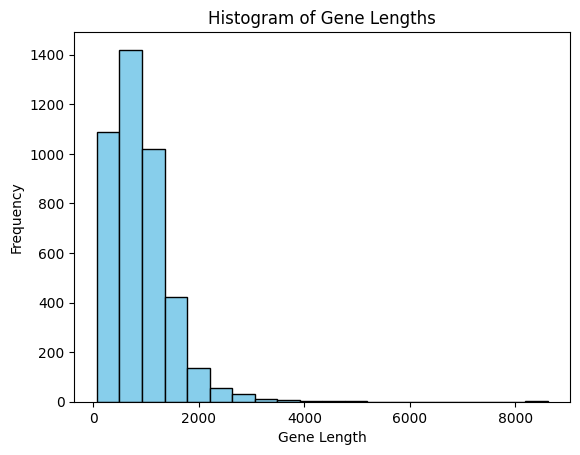

Number of genes on the plus strand: 2074
Number of genes on the minus strand: 2129
Number of protein-encoding genes on the plus strand: 1998
Number of protein-encoding genes on the minus strand: 2110


In [67]:
#Now we gonna calculate the length of each gene and plot it
# Initialize variables to store gene lengths and counts
gene_lengths = []
plus_strand_genes = 0
minus_strand_genes = 0
protein_coding_genes_plus = 0
protein_coding_genes_minus = 0

# Parse the GenBank file
for record in SeqIO.parse(genbank_file, "genbank"):
    for feature in record.features:
        if feature.type == "gene":
            # Calculate gene length
            gene_length = abs(feature.location.end - feature.location.start)
            gene_lengths.append(gene_length)
            
            # Check strand and count genes
            if feature.location.strand == 1:
                plus_strand_genes += 1
            elif feature.location.strand == -1:
                minus_strand_genes += 1

#counting CDS on each strand
for record in SeqIO.parse(genbank_file, "genbank"):
    for feature in record.features:
        if feature.type == "CDS":
            if feature.location.strand == 1:
                protein_coding_genes_plus += 1
            elif feature.location.strand == -1:
                protein_coding_genes_minus += 1

# Plot histogram of gene lengths
plt.hist(gene_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Gene Length')
plt.ylabel('Frequency')
plt.title('Histogram of Gene Lengths')
plt.show()

# Print the number of genes in each group and the number of protein-encoding genes
print(f"Number of genes on the plus strand: {plus_strand_genes}")
print(f"Number of genes on the minus strand: {minus_strand_genes}")
print(f"Number of protein-encoding genes on the plus strand: {protein_coding_genes_plus}")
print(f"Number of protein-encoding genes on the minus strand: {protein_coding_genes_minus}")